# NLTK Chapter 6

## Learning to Classify Text

*The html version of this chapter in the book is available [here](https://www.nltk.org/book/ch06.html "ch06").*

### 1 Supervised Classification

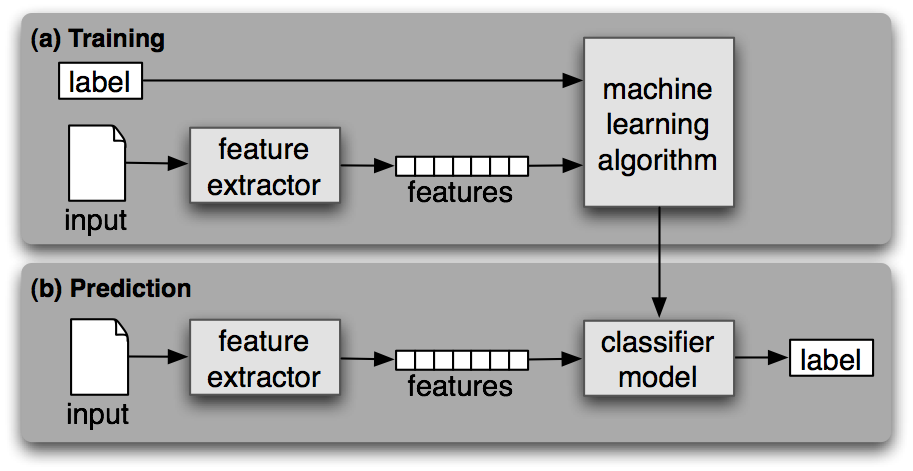

In [1]:
from IPython.display import display, Image

display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\supervised-classification.png"))

#### 1.1 Gender Identification

*Guessing the gender of a name based on the last letter:*

In [34]:
def gender_features(word):
    return {'last_letter': word[-1]}

In [35]:
import nltk, random
from nltk.corpus import names

labeled_names = ([(name, 'male') for name in names.words('male.txt')] + 
                 [(name, 'female') for name in names.words('female.txt')])

random.shuffle(labeled_names)

*Creating feature, training, and test sets:*

In [36]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [37]:
classifier.classify(gender_features('Neo'))

'male'

In [38]:
classifier.classify(gender_features('Trinity'))

'female'

*Finding accuracy:*

In [39]:
print(nltk.classify.accuracy(classifier, test_set))

0.776


*Most informative features:*

In [40]:
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     33.4 : 1.0
             last_letter = 'k'              male : female =     32.9 : 1.0
             last_letter = 'f'              male : female =     16.5 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'v'              male : female =     10.4 : 1.0


__Your Turn__: Modify the `gender_features()` function to provide the classifier with features encoding the length of the name, its first letter, and any other features that seem like they might be informative. Retrain the classifier with these new features, and test its accuracy.

In [41]:
def gender_features(word):
    return {'last_letter': word[-1],
            'length'     : len(word)}

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.776


In [71]:
def gender_features(word):
    return {'last_letter' : word[-1],
            'length'      : len(word),
            "first_letter": word[0]}

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.798


In [73]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            "first_letter" : word[0],
            "number_vowels": sum([1 for ch in word if ch in 'AEIOUaeiouy'])}

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.794


*It appears that counting the number of vowels confuses the classifier slightly...*

In [44]:
classifier.show_most_informative_features(30)

Most Informative Features
             last_letter = 'a'            female : male   =     33.4 : 1.0
             last_letter = 'k'              male : female =     32.9 : 1.0
             last_letter = 'f'              male : female =     16.5 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'v'              male : female =     10.4 : 1.0
             last_letter = 'd'              male : female =     10.2 : 1.0
             last_letter = 'o'              male : female =      8.3 : 1.0
             last_letter = 'm'              male : female =      8.3 : 1.0
            first_letter = 'z'              male : female =      7.1 : 1.0
            first_letter = 'k'              male : female =      7.0 : 1.0
             last_letter = 'r'              male : female =      6.2 : 1.0
             last_letter = 'w'              male : female =      5.0 : 1.0
             last_letter = 'g'              male : female =      5.0 : 1.0

In [74]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:]}

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.812


In [75]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2]}
            

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.814


In [76]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'first_vowel'  : [i for i in range(len(word)) 
                              if word[i] in 'AEIOUaeiouy'][0]}
            

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.814


In [80]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'second_letter': word[1],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'first_vowel'  : [i for i in range(len(word)) 
                              if word[i] in 'AEIOUaeiouy'][0]}
            

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.808


*The position of the first vowel also seems to confuse the classifier. Saving a list with all the features may take up a large amount of memory.  `nltk.classify.apply_features` returns an object that acts like a list but does not sotre all the feature sets in memory:*

In [78]:
from nltk.classify import apply_features
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

In [79]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.808


#### 1.2 Choosing the Right Features



In [81]:
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

In [83]:
print(gender_features2('John'), end = '')

{'first_letter': 'j', 'last_letter': 'n', 'count(a)': 0, 'has(a)': False, 'count(b)': 0, 'has(b)': False, 'count(c)': 0, 'has(c)': False, 'count(d)': 0, 'has(d)': False, 'count(e)': 0, 'has(e)': False, 'count(f)': 0, 'has(f)': False, 'count(g)': 0, 'has(g)': False, 'count(h)': 1, 'has(h)': True, 'count(i)': 0, 'has(i)': False, 'count(j)': 1, 'has(j)': True, 'count(k)': 0, 'has(k)': False, 'count(l)': 0, 'has(l)': False, 'count(m)': 0, 'has(m)': False, 'count(n)': 1, 'has(n)': True, 'count(o)': 1, 'has(o)': True, 'count(p)': 0, 'has(p)': False, 'count(q)': 0, 'has(q)': False, 'count(r)': 0, 'has(r)': False, 'count(s)': 0, 'has(s)': False, 'count(t)': 0, 'has(t)': False, 'count(u)': 0, 'has(u)': False, 'count(v)': 0, 'has(v)': False, 'count(w)': 0, 'has(w)': False, 'count(x)': 0, 'has(x)': False, 'count(y)': 0, 'has(y)': False, 'count(z)': 0, 'has(z)': False}

*This classifier actually performs worse.  Having too many features will cause the classifier to __overfit__ to the training set, and it will thus have problems generalizing to the observations in the test set:*

In [84]:
featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.784


*One way to refine the feature is __error analysis__.  We'll make a __development set__, which contains the __training set__ and the __dev-test__ set.  The __dev-test__ has to be kept separate from the test set:*

In [85]:
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

In [86]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.802


*Compiling the errors:*

In [89]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append((tag, guess, name))

*We can then examine the errors:*

In [102]:
for (tag, guess, name) in sorted(errors):
    print('correct={:<8} guess={:<8} name={:<30}'.format(tag, guess, name))

correct=female   guess=male     name=Alison                        
correct=female   guess=male     name=Allison                       
correct=female   guess=male     name=Ardeen                        
correct=female   guess=male     name=Astrid                        
correct=female   guess=male     name=Austin                        
correct=female   guess=male     name=Avis                          
correct=female   guess=male     name=Avril                         
correct=female   guess=male     name=Bamby                         
correct=female   guess=male     name=Barby                         
correct=female   guess=male     name=Beatriz                       
correct=female   guess=male     name=Brear                         
correct=female   guess=male     name=Bridget                       
correct=female   guess=male     name=Britaney                      
correct=female   guess=male     name=Bunnie                        
correct=female   guess=male     name=Cameo      

*I noticed doubled letters are quite common in the mistaken names, so I decided to make that a feature:*


In [105]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'first_vowel'  : [i for i in range(len(word)) 
                              if word[i] in 'AEIOUaeiouy'][0],
            'double_letters': sum([1 for ch in range(len(word) - 1)
                                  if word[ch] == word[ch + 1]])}
            

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.816


#### 1.3 Document Classification

*Looking at movie reviews to build a classifier to determine if a review is positive or negative:*

In [114]:
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

*Making a feature extractor.  We'll make a list of the 2,000 most common words in the corpus, and then check for the presence of these words in a given document:*

In [111]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)]  = (word in document_words)
    return features

In [112]:
print(document_features(movie_reviews.words('pos/cv957_8737.txt')))

{'contains(plot)': True, 'contains(:)': True, 'contains(two)': True, 'contains(teen)': False, 'contains(couples)': False, 'contains(go)': False, 'contains(to)': True, 'contains(a)': True, 'contains(church)': False, 'contains(party)': False, 'contains(,)': True, 'contains(drink)': False, 'contains(and)': True, 'contains(then)': True, 'contains(drive)': False, 'contains(.)': True, 'contains(they)': True, 'contains(get)': True, 'contains(into)': True, 'contains(an)': True, 'contains(accident)': False, 'contains(one)': True, 'contains(of)': True, 'contains(the)': True, 'contains(guys)': False, 'contains(dies)': False, 'contains(but)': True, 'contains(his)': True, 'contains(girlfriend)': True, 'contains(continues)': False, 'contains(see)': False, 'contains(him)': True, 'contains(in)': True, 'contains(her)': False, 'contains(life)': False, 'contains(has)': True, 'contains(nightmares)': False, 'contains(what)': True, "contains(')": True, 'contains(s)': True, 'contains(deal)': False, 'contains

*Now we can train a classifier, and then check its accuracy:*

In [115]:
featuresets = [(document_features(d), c) for (d, c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.78


*Most informative features.  As was the case with the accuracy, the figures will be slightly different from the book, since our test set was randomly selected from the entire corpus, and thus is different from the one that was used in the book.*

In [116]:
classifier.show_most_informative_features(5)

Most Informative Features
 contains(unimaginative) = True              neg : pos    =      8.3 : 1.0
    contains(schumacher) = True              neg : pos    =      7.4 : 1.0
        contains(suvari) = True              neg : pos    =      7.0 : 1.0
        contains(sexist) = True              neg : pos    =      7.0 : 1.0
          contains(mena) = True              neg : pos    =      7.0 : 1.0


#### 1.4 Part-of-Speech Tagging